<a href="https://colab.research.google.com/github/mhtabkrklt/ML3/blob/main/task4/task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files

%precision %.4f

import warnings
warnings.filterwarnings('ignore')


uploaded = files.upload()

Saving income.csv to income.csv


**1. Прочитать данные из файла**

In [ ]:
df=pd.read_csv('income.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


**2. Проверьте количество строк и столбцов.**

In [ ]:
print(df.shape)

(48842, 15)


**3. проверка типов данных и нулевых значений**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


**4. Сводная статистика по числовым данным**

In [ ]:
print(df.describe())

                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


**5. Проверить отсутствующее значение**

In [ ]:
df.replace('?', pd.NA, inplace=True)
print(df.isnull().sum())

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


**6. заполните пропущенные значения в категориальных столбцах наиболее частым значением**

In [ ]:
categorical_columns = ["workclass", "occupation", "native-country"]  # Example columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print(df.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


**7. преобразовать доход в двоичную переменную для использования в моделях машинного обучения**

In [ ]:
print(df['income'].value_counts())
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
print(df['income'].head())

income
<=50K    37155
>50K     11687
Name: count, dtype: int64
0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64


**8. Проверка преобразования**

In [ ]:
print(df['income'].unique())

[0 1]


**9. Сравните целевую переменную (доход) с числовыми характеристиками**

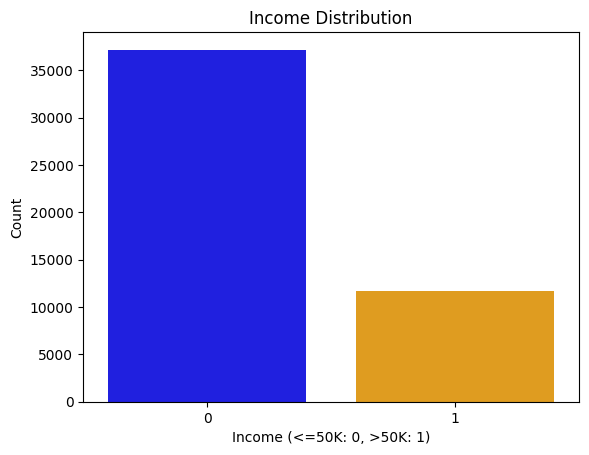

In [ ]:
sns.countplot(x='income', data=df, palette=["blue", "orange"])
plt.title('Income Distribution')
plt.xlabel('Income (<=50K: 0, >50K: 1)')
plt.ylabel('Count')
plt.show()


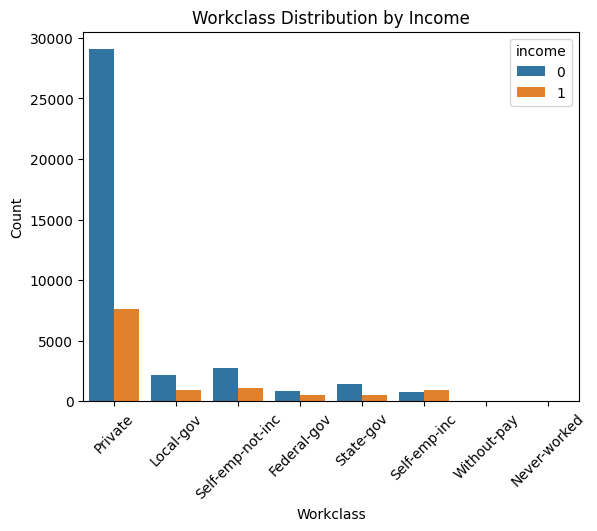

In [ ]:
sns.countplot(x='workclass', hue='income', data=df)
plt.title('Workclass Distribution by Income')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


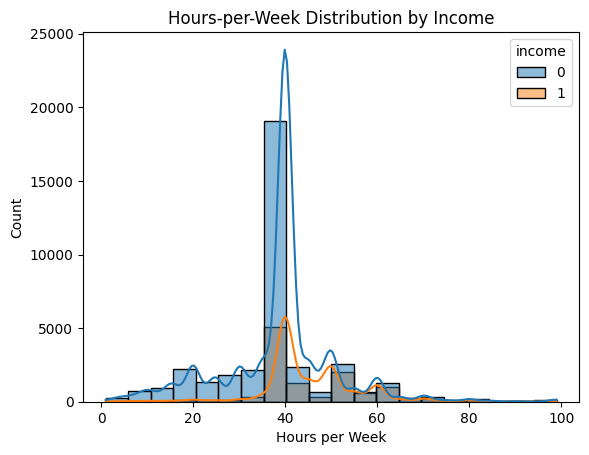

In [ ]:
sns.histplot(data=df, x='hours-per-week', hue='income', kde=True, bins=20)
plt.title('Hours-per-Week Distribution by Income')
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.show()


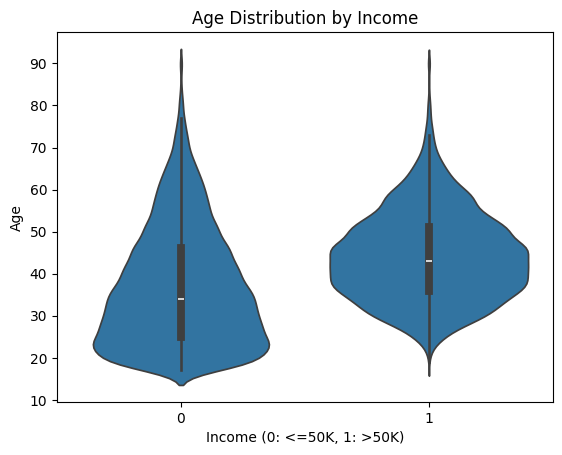

In [ ]:
sns.violinplot(x='income', y='age', data=df)
plt.title('Age Distribution by Income')
plt.xlabel('Income (0: <=50K, 1: >50K)')
plt.ylabel('Age')
plt.show()


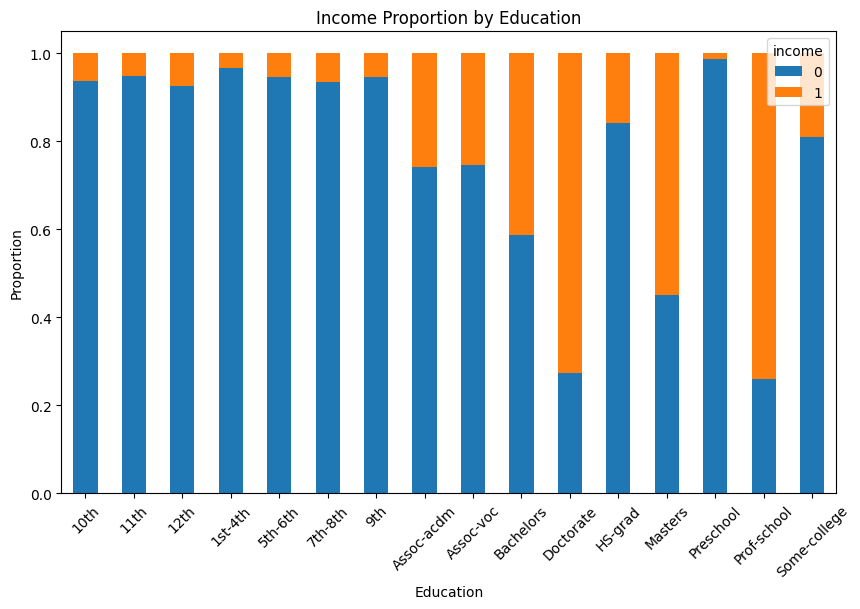

In [ ]:
education_income = pd.crosstab(df['education'], df['income'], normalize='index')
education_income.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Income Proportion by Education')
plt.xlabel('Education')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()


**10. Разделение данных**

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('income', axis=1)  # Drop the target column
y = df['income']              # Target column

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (39073, 14)
Test set size: (9769, 14)


**11. Масштабирование данных**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify numerical and categorical columns
numerical_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),        # Scale numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # One-hot encode categorical features
    ])

# Fit and transform the training data, transform the test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Output the preprocessed training data
print("Preprocessed Training Data:")
print(X_train_preprocessed)

Preprocessed Training Data:
  (0, 0)	0.24612342776517585
  (0, 1)	-0.42183885883828254
  (0, 2)	-0.029835979395530777
  (0, 3)	-0.14445586929597637
  (0, 4)	-0.21972584898884803
  (0, 5)	-0.03437006687179304
  (0, 8)	1.0
  (0, 27)	1.0
  (0, 29)	1.0
  (0, 39)	1.0
  (0, 55)	1.0
  (0, 56)	1.0
  (0, 94)	1.0
  (1, 0)	0.9747943850583952
  (1, 1)	-0.13860352716030921
  (1, 2)	-1.5852478845610598
  (1, 3)	-0.14445586929597637
  (1, 4)	-0.21972584898884803
  (1, 5)	-0.4357273958860098
  (1, 10)	1.0
  (1, 29)	1.0
  (1, 35)	1.0
  (1, 55)	1.0
  (1, 56)	1.0
  (1, 94)	1.0
  :	:
  (39071, 0)	0.5375918106824636
  (39071, 1)	-0.882193518147263
  (39071, 2)	0.3590169968958515
  (39071, 3)	-0.14445586929597637
  (39071, 4)	-0.21972584898884803
  (39071, 5)	-0.03437006687179304
  (39071, 11)	1.0
  (39071, 20)	1.0
  (39071, 32)	1.0
  (39071, 50)	1.0
  (39071, 53)	1.0
  (39071, 94)	1.0
  (39072, 0)	1.4848640551636487
  (39072, 1)	-0.12827180356557105
  (39072, 2)	1.5255759257699981
  (39072, 3)	-0.144455869

**13. Самостоятельно реализуйте алгоритмы Bagging**

In [ ]:
class CustomBaggingClassifier:
    def __init__(self, base_model, n_estimators=10):
        self.base_model = base_model
        self.n_estimators = n_estimators
        self.models = []

    def fit(self, X, y):
        from sklearn.utils import resample
        self.models = []
        for _ in range(self.n_estimators):
            X_sample, y_sample = resample(X, y)
            model = self.base_model()
            model.fit(X_sample, y_sample)
            self.models.append(model)

    def predict(self, X):
        import numpy as np
        predictions = np.array([model.predict(X) for model in self.models])
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

    def get_params(self, deep=True):
        # Return all hyperparameters as a dictionary
        return {"base_model": self.base_model, "n_estimators": self.n_estimators}

    def set_params(self, **params):
        # Update hyperparameters based on the provided dictionary
        for param, value in params.items():
            setattr(self, param, value)
        return self


**14. Самостоятельно реализуйте алгоритмы AdaBoost**

In [ ]:
import numpy as np
from sklearn.utils import resample

class CustomAdaBoostClassifier:
    def __init__(self, base_model, n_estimators=10):
        """
        Custom implementation of AdaBoostClassifier.
        :param base_model: The weak learner (e.g., DecisionTreeClassifier).
        :param n_estimators: The number of weak learners to train.
        """
        self.base_model = base_model
        self.n_estimators = n_estimators
        self.models = []
        self.alphas = []

    def fit(self, X, y):
        """
        Train the AdaBoost model.
        :param X: Training data.
        :param y: Target labels.
        """
        n_samples = X.shape[0]
        # Initialize sample weights
        weights = np.ones(n_samples) / n_samples
        self.models = []
        self.alphas = []

        for _ in range(self.n_estimators):
            # Train a weak learner
            model = self.base_model()
            model.fit(X, y, sample_weight=weights)
            predictions = model.predict(X)

            # Compute error
            error = np.sum(weights * (predictions != y)) / np.sum(weights)
            if error > 0.5:
                break  # Stop if error is too high

            # Compute alpha (model weight)
            alpha = 0.5 * np.log((1 - error) / error)
            self.models.append(model)
            self.alphas.append(alpha)

            # Update sample weights
            weights *= np.exp(-alpha * y * predictions)
            weights /= np.sum(weights)  # Normalize weights

    def predict(self, X):
        """
        Predict using the trained AdaBoost model.
        :param X: Test data.
        :return: Predicted labels.
        """
        final_predictions = np.zeros(X.shape[0])
        for alpha, model in zip(self.alphas, self.models):
            final_predictions += alpha * model.predict(X)
        return np.sign(final_predictions)  # Majority vote

    def get_params(self, deep=True):
        """
        Return the hyperparameters as a dictionary.
        :param deep: Whether to return nested parameters (not applicable here).
        :return: Dictionary of hyperparameters.
        """
        return {"base_model": self.base_model, "n_estimators": self.n_estimators}

    def set_params(self, **params):
        """
        Set the hyperparameters.
        :param params: Dictionary of parameters to set.
        :return: self
        """
        for param, value in params.items():
            setattr(self, param, value)
        return self


**15. Define Wrappers for Your Custom Models**

In [ ]:
# Wrapping custom Bagging
def custom_bagging():
    return CustomBaggingClassifier(base_model=DecisionTreeClassifier, n_estimators=10)

# Wrapping custom AdaBoost
def custom_adaboost():
    return CustomAdaBoostClassifier(base_model=DecisionTreeClassifier, n_estimators=10)


**16. Train and test All Model**

Training Custom Bagging...
Best Hyperparameters for Custom Bagging: {'n_estimators': 20}
Accuracy: 0.8553, Precision: 0.8500, Recall: 0.8553, F1 Score: 0.8516
Training Time: 85.97 seconds
--------------------------------------------------
Training Custom AdaBoost...
Best Hyperparameters for Custom AdaBoost: {'n_estimators': 10}
Accuracy: 0.7513, Precision: 0.8319, Recall: 0.7513, F1 Score: 0.7691
Training Time: 77.23 seconds
--------------------------------------------------
Training Sklearn Bagging...
Best Hyperparameters for Sklearn Bagging: {'estimator__max_depth': 5, 'n_estimators': 10}
Accuracy: 0.8598, Precision: 0.8537, Recall: 0.8598, F1 Score: 0.8502
Training Time: 70.09 seconds
--------------------------------------------------
Training Random Forest...
Best Hyperparameters for Random Forest: {'max_depth': 20, 'n_estimators': 150}
Accuracy: 0.8683, Precision: 0.8628, Recall: 0.8683, F1 Score: 0.8617
Training Time: 182.48 seconds
-----------------------------------------------

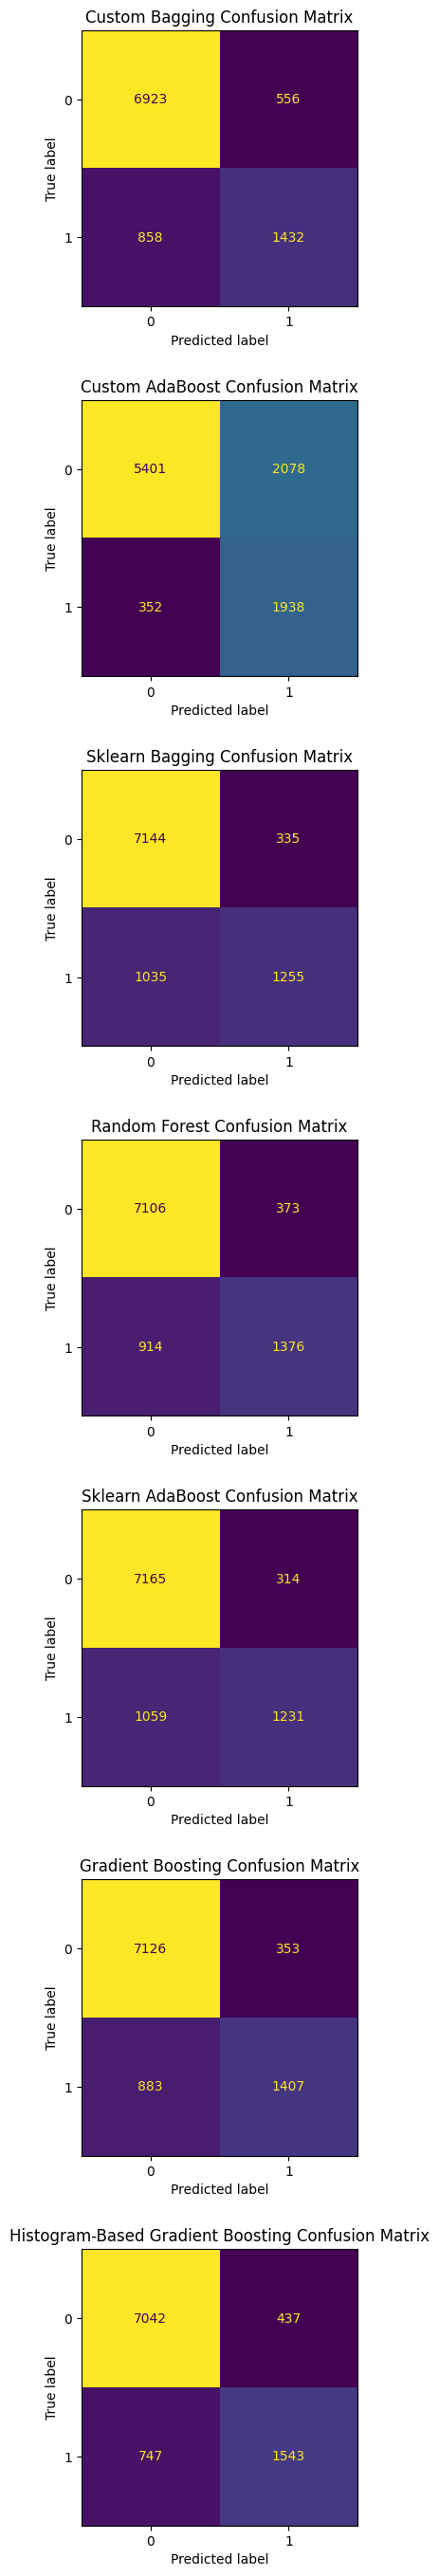

Summary of Results:

Custom Bagging:
  Accuracy: 0.8553
  Precision: 0.8500
  Recall: 0.8553
  F1 Score: 0.8516
  Training Time: 85.9749

Custom AdaBoost:
  Accuracy: 0.7513
  Precision: 0.8319
  Recall: 0.7513
  F1 Score: 0.7691
  Training Time: 77.2292

Sklearn Bagging:
  Accuracy: 0.8598
  Precision: 0.8537
  Recall: 0.8598
  F1 Score: 0.8502
  Training Time: 70.0877

Random Forest:
  Accuracy: 0.8683
  Precision: 0.8628
  Recall: 0.8683
  F1 Score: 0.8617
  Training Time: 182.4763

Sklearn AdaBoost:
  Accuracy: 0.8595
  Precision: 0.8538
  Recall: 0.8595
  F1 Score: 0.8491
  Training Time: 101.6993

Gradient Boosting:
  Accuracy: 0.8735
  Precision: 0.8686
  Recall: 0.8735
  F1 Score: 0.8674
  Training Time: 179.5081

Histogram-Based Gradient Boosting:
  Accuracy: 0.8788
  Precision: 0.8748
  Recall: 0.8788
  F1 Score: 0.8756
  Training Time: 59.3468


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, BaggingClassifier as SklearnBagging
from sklearn.ensemble import AdaBoostClassifier as SklearnAdaBoost
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import time

# Define all models
models = {
    "Custom Bagging": custom_bagging(),  # Calls your custom BaggingClassifier
    "Custom AdaBoost": custom_adaboost(),  # Calls your custom AdaBoostClassifier
    "Sklearn Bagging": SklearnBagging(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Sklearn AdaBoost": SklearnAdaBoost(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Histogram-Based Gradient Boosting": HistGradientBoostingClassifier(max_iter=100, random_state=42),
}

# Define parameter grids for hyperparameter selection and cross-validation
param_grids = {
    "Custom Bagging": {"n_estimators": [5, 10, 20]},
    "Custom AdaBoost": {"n_estimators": [10, 50]},
    "Sklearn Bagging": {"n_estimators": [10, 20], "estimator__max_depth": [3, 5, None]},
    "Random Forest": {"n_estimators": [50, 100, 150], "max_depth": [None, 10, 20]},
    "Sklearn AdaBoost": {"n_estimators": [50, 100], "learning_rate": [0.1, 0.01]},
    "Gradient Boosting": {"n_estimators": [50, 100], "learning_rate": [0.1, 0.01]},
    "Histogram-Based Gradient Boosting": {"max_iter": [50, 100], "learning_rate": [0.1, 0.01]},
}

# Dictionary to store results
results = {}



# Evaluate models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    start_time = time.time()

    if model_name in param_grids:
        # Perform cross-validation and hyperparameter tuning
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
        grid_search.fit(X_train_preprocessed.toarray(), y_train)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test_preprocessed.toarray())
        print(f"Best Hyperparameters for {model_name}: {grid_search.best_params_}")
    else:
        # Train without hyperparameter tuning
        if model_name.startswith("Custom"):
            model.fit(X_train_preprocessed, y_train)  # Custom fit
            y_pred = model.predict(X_test_preprocessed)  # Custom predict
        else:
            model.fit(X_train_preprocessed.toarray(), y_train)  # Sklearn fit
            y_pred = model.predict(X_test_preprocessed.toarray())  # Sklearn predict

    # Measure time taken
    training_time = time.time() - start_time

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Training Time": training_time,
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print("-" * 50)

# Display confusion matrices
fig, axes = plt.subplots(len(models), 1, figsize=(8, len(models) * 4))
fig.tight_layout(pad=5.0)

for i, (model_name, metrics) in enumerate(results.items()):
    cm = metrics["Confusion Matrix"]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    ax = axes[i] if len(models) > 1 else axes
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(f"{model_name} Confusion Matrix")

plt.show()

# Print all results
print("Summary of Results:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        if metric_name != "Confusion Matrix":
            print(f"  {metric_name}: {value:.4f}")

**17. Also add to comparison models from XGBoost , LightGBM and CatBoost libraries  And Use the Optuna framework to select hyperparameters **

In [ ]:
!pip install --upgrade optuna
!pip install catboost



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


Training Custom Bagging...
Custom Bagging - Accuracy: 0.8567, Precision: 0.8507, Recall: 0.8567, F1 Score: 0.8520
Training Time: 19.84 seconds
--------------------------------------------------
Training Custom AdaBoost...
Custom AdaBoost - Accuracy: 0.7495, Precision: 0.8321, Recall: 0.7495, F1 Score: 0.7676
Training Time: 17.72 seconds
--------------------------------------------------
Training Sklearn Bagging...


[I 2024-12-12 12:45:37,307] A new study created in memory with name: no-name-68c54136-58c5-4800-9e59-467f87e14ef9


Sklearn Bagging - Accuracy: 0.8556, Precision: 0.8495, Recall: 0.8556, F1 Score: 0.8508
Training Time: 5.10 seconds
--------------------------------------------------
Training Random Forest...


[I 2024-12-12 12:45:38,099] Trial 0 finished with value: 0.7655850138192241 and parameters: {'n_estimators': 130, 'max_depth': 25, 'min_samples_split': 0.6732914605829412}. Best is trial 0 with value: 0.7655850138192241.
[I 2024-12-12 12:45:39,420] Trial 1 finished with value: 0.7989558808475791 and parameters: {'n_estimators': 58, 'max_depth': 10, 'min_samples_split': 0.27676160233994856}. Best is trial 1 with value: 0.7989558808475791.
[I 2024-12-12 12:45:40,923] Trial 2 finished with value: 0.7655850138192241 and parameters: {'n_estimators': 91, 'max_depth': 21, 'min_samples_split': 0.5364711900315028}. Best is trial 1 with value: 0.7989558808475791.
[I 2024-12-12 12:45:42,377] Trial 3 finished with value: 0.7725458081686969 and parameters: {'n_estimators': 78, 'max_depth': 12, 'min_samples_split': 0.341802700154081}. Best is trial 1 with value: 0.7989558808475791.
[I 2024-12-12 12:45:43,780] Trial 4 finished with value: 0.8419490224178524 and parameters: {'n_estimators': 66, 'max_d

Best parameters for Random Forest: {'n_estimators': 117, 'max_depth': 12, 'min_samples_split': 0.1013535946930636}
Best score for Random Forest: 0.8466577950660252
Random Forest - Accuracy: 0.8467, Precision: 0.8403, Recall: 0.8467, F1 Score: 0.8319
Training Time: 43.25 seconds
--------------------------------------------------
Training Sklearn AdaBoost...


[I 2024-12-12 12:46:24,660] A new study created in memory with name: no-name-82a5eccc-a352-4e7b-9fab-c4a20e000fa2


Sklearn AdaBoost - Accuracy: 0.8687, Precision: 0.8633, Recall: 0.8687, F1 Score: 0.8635
Training Time: 4.04 seconds
--------------------------------------------------
Training Gradient Boosting...


[I 2024-12-12 12:46:50,237] Trial 0 finished with value: 0.8773671819019347 and parameters: {'n_estimators': 66, 'learning_rate': 0.13454279690469947, 'max_depth': 9}. Best is trial 0 with value: 0.8773671819019347.
[I 2024-12-12 12:48:42,403] Trial 1 finished with value: 0.8647763332992118 and parameters: {'n_estimators': 156, 'learning_rate': 0.13153386452139632, 'max_depth': 14}. Best is trial 0 with value: 0.8773671819019347.
[I 2024-12-12 12:49:37,623] Trial 2 finished with value: 0.8684614597195209 and parameters: {'n_estimators': 144, 'learning_rate': 0.2654227401786584, 'max_depth': 8}. Best is trial 0 with value: 0.8773671819019347.
[I 2024-12-12 12:51:25,999] Trial 3 finished with value: 0.8662094380182209 and parameters: {'n_estimators': 166, 'learning_rate': 0.2510508570414788, 'max_depth': 14}. Best is trial 0 with value: 0.8773671819019347.
[I 2024-12-12 12:52:03,068] Trial 4 finished with value: 0.8738867847271983 and parameters: {'n_estimators': 196, 'learning_rate': 0.

Best parameters for Gradient Boosting: {'n_estimators': 114, 'learning_rate': 0.12680587600336976, 'max_depth': 6}
Best score for Gradient Boosting: 0.8801310267171666
Gradient Boosting - Accuracy: 0.8801, Precision: 0.8761, Recall: 0.8801, F1 Score: 0.8768
Training Time: 934.46 seconds
--------------------------------------------------
Training Histogram-Based Gradient Boosting...


[I 2024-12-12 13:02:03,164] A new study created in memory with name: no-name-da9218c3-dc81-4344-bcf4-33719adde102


Histogram-Based Gradient Boosting - Accuracy: 0.8788, Precision: 0.8748, Recall: 0.8788, F1 Score: 0.8756
Training Time: 3.98 seconds
--------------------------------------------------
Training XGBoost...


[I 2024-12-12 13:02:04,604] Trial 0 finished with value: 0.8783908281297983 and parameters: {'n_estimators': 73, 'max_depth': 4, 'learning_rate': 0.15400830159548742, 'subsample': 0.8977436671519192}. Best is trial 0 with value: 0.8783908281297983.
[I 2024-12-12 13:02:07,837] Trial 1 finished with value: 0.8673354488688709 and parameters: {'n_estimators': 190, 'max_depth': 12, 'learning_rate': 0.13218003511378212, 'subsample': 0.6844845625426872}. Best is trial 0 with value: 0.8783908281297983.
[I 2024-12-12 13:02:09,730] Trial 2 finished with value: 0.8792097451120893 and parameters: {'n_estimators': 99, 'max_depth': 11, 'learning_rate': 0.03735030188988568, 'subsample': 0.7751446350960469}. Best is trial 2 with value: 0.8792097451120893.
[I 2024-12-12 13:02:11,721] Trial 3 finished with value: 0.8629337700890573 and parameters: {'n_estimators': 114, 'max_depth': 11, 'learning_rate': 0.28980719092208806, 'subsample': 0.6370169826616227}. Best is trial 2 with value: 0.8792097451120893.

Best parameters for XGBoost: {'n_estimators': 138, 'max_depth': 10, 'learning_rate': 0.04228425687619293, 'subsample': 0.928266415101143}
Best score for XGBoost: 0.8799262974715938


[I 2024-12-12 13:02:51,682] A new study created in memory with name: no-name-54f3d875-8e10-420b-8d67-ef8b1012fe71


XGBoost - Accuracy: 0.8799, Precision: 0.8756, Recall: 0.8799, F1 Score: 0.8758
Training Time: 48.47 seconds
--------------------------------------------------
Training LightGBM...
[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

[I 2024-12-12 13:02:52,891] Trial 0 finished with value: 0.880540485208312 and parameters: {'n_estimators': 171, 'learning_rate': 0.05448890281193705, 'max_depth': 7, 'num_leaves': 48}. Best is trial 0 with value: 0.880540485208312.


[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-12-12 13:02:53,258] Trial 1 finished with value: 0.8597604667826799 and parameters: {'n_estimators': 58, 'learning_rate': 0.08005594735485852, 'max_depth': 2, 'num_leaves': 33}. Best is trial 0 with value: 0.880540485208312.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]:

[I 2024-12-12 13:02:54,121] Trial 2 finished with value: 0.8746033370867028 and parameters: {'n_estimators': 112, 'learning_rate': 0.24808873393826222, 'max_depth': 15, 'num_leaves': 50}. Best is trial 0 with value: 0.880540485208312.


[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948


[I 2024-12-12 13:02:55,395] Trial 3 finished with value: 0.8767529941652165 and parameters: {'n_estimators': 191, 'learning_rate': 0.20213183903984205, 'max_depth': 12, 'num_leaves': 22}. Best is trial 0 with value: 0.880540485208312.


[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-12-12 13:02:56,279] Trial 4 finished with value: 0.8792097451120893 and parameters: {'n_estimators': 103, 'learning_rate': 0.20889705110678958, 'max_depth': 4, 'num_leaves': 23}. Best is trial 0 with value: 0.880540485208312.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948


[I 2024-12-12 13:02:58,206] Trial 5 finished with value: 0.8799262974715938 and parameters: {'n_estimators': 196, 'learning_rate': 0.03515304615055682, 'max_depth': -1, 'num_leaves': 32}. Best is trial 0 with value: 0.880540485208312.


[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-12-12 13:02:58,974] Trial 6 finished with value: 0.8705087521752483 and parameters: {'n_estimators': 102, 'learning_rate': 0.03947115899880004, 'max_depth': 5, 'num_leaves': 44}. Best is trial 0 with value: 0.880540485208312.


[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948


[I 2024-12-12 13:02:59,912] Trial 7 finished with value: 0.8779813696386529 and parameters: {'n_estimators': 176, 'learning_rate': 0.2224011862990909, 'max_depth': 0, 'num_leaves': 35}. Best is trial 0 with value: 0.880540485208312.


[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948


[I 2024-12-12 13:03:00,405] Trial 8 finished with value: 0.8790050158665166 and parameters: {'n_estimators': 66, 'learning_rate': 0.20913133497184525, 'max_depth': 10, 'num_leaves': 30}. Best is trial 0 with value: 0.880540485208312.


[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948


[I 2024-12-12 13:03:01,091] Trial 9 finished with value: 0.8808475790766711 and parameters: {'n_estimators': 116, 'learning_rate': 0.16306119401406458, 'max_depth': 12, 'num_leaves': 24}. Best is trial 9 with value: 0.8808475790766711.


[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948


[I 2024-12-12 13:03:01,948] Trial 10 finished with value: 0.8811546729450302 and parameters: {'n_estimators': 142, 'learning_rate': 0.1151765023488173, 'max_depth': 11, 'num_leaves': 26}. Best is trial 10 with value: 0.8811546729450302.


[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948


[I 2024-12-12 13:03:02,822] Trial 11 finished with value: 0.880540485208312 and parameters: {'n_estimators': 147, 'learning_rate': 0.12326914225921967, 'max_depth': 11, 'num_leaves': 26}. Best is trial 10 with value: 0.8811546729450302.


[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948


[I 2024-12-12 13:03:03,599] Trial 12 finished with value: 0.879414474357662 and parameters: {'n_estimators': 139, 'learning_rate': 0.14306498403363385, 'max_depth': 15, 'num_leaves': 20}. Best is trial 10 with value: 0.8811546729450302.


[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948


[I 2024-12-12 13:03:04,441] Trial 13 finished with value: 0.8795168389804484 and parameters: {'n_estimators': 131, 'learning_rate': 0.10223755075612026, 'max_depth': 9, 'num_leaves': 27}. Best is trial 10 with value: 0.8811546729450302.


[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948


[I 2024-12-12 13:03:05,095] Trial 14 finished with value: 0.8779813696386529 and parameters: {'n_estimators': 84, 'learning_rate': 0.16998462449650906, 'max_depth': 13, 'num_leaves': 41}. Best is trial 10 with value: 0.8811546729450302.


[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948


[I 2024-12-12 13:03:05,936] Trial 15 finished with value: 0.8772648172791483 and parameters: {'n_estimators': 157, 'learning_rate': 0.28734036066350965, 'max_depth': 7, 'num_leaves': 26}. Best is trial 10 with value: 0.8811546729450302.


[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-12-12 13:03:06,739] Trial 16 finished with value: 0.8781860988842256 and parameters: {'n_estimators': 120, 'learning_rate': 0.16427332423270452, 'max_depth': 9, 'num_leaves': 39}. Best is trial 10 with value: 0.8811546729450302.


[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948


[I 2024-12-12 13:03:07,398] Trial 17 finished with value: 0.8808475790766711 and parameters: {'n_estimators': 79, 'learning_rate': 0.09711685328592345, 'max_depth': 13, 'num_leaves': 29}. Best is trial 10 with value: 0.8811546729450302.


[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948


[I 2024-12-12 13:03:08,382] Trial 18 finished with value: 0.8790050158665166 and parameters: {'n_estimators': 155, 'learning_rate': 0.1384321708132118, 'max_depth': 13, 'num_leaves': 24}. Best is trial 10 with value: 0.8811546729450302.


[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-12-12 13:03:09,579] Trial 19 finished with value: 0.8777766403930801 and parameters: {'n_estimators': 127, 'learning_rate': 0.17937688124062132, 'max_depth': 9, 'num_leaves': 36}. Best is trial 10 with value: 0.8811546729450302.


Best parameters for LightGBM: {'n_estimators': 142, 'learning_rate': 0.1151765023488173, 'max_depth': 11, 'num_leaves': 26}
Best score for LightGBM: 0.8811546729450302
[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948


[I 2024-12-12 13:03:10,869] A new study created in memory with name: no-name-0a56fe34-7ad4-4ae7-9f79-39f626786597


LightGBM - Accuracy: 0.8812, Precision: 0.8772, Recall: 0.8812, F1 Score: 0.8778
Training Time: 19.18 seconds
--------------------------------------------------
Training CatBoost...


[I 2024-12-12 13:03:15,171] Trial 0 finished with value: 0.8792097451120893 and parameters: {'iterations': 168, 'depth': 7, 'learning_rate': 0.10352657609742201}. Best is trial 0 with value: 0.8792097451120893.
[I 2024-12-12 13:03:17,876] Trial 1 finished with value: 0.8765482649196438 and parameters: {'iterations': 103, 'depth': 4, 'learning_rate': 0.14810814026281832}. Best is trial 0 with value: 0.8792097451120893.
[I 2024-12-12 13:03:25,578] Trial 2 finished with value: 0.8751151602006346 and parameters: {'iterations': 184, 'depth': 9, 'learning_rate': 0.18291129733872763}. Best is trial 0 with value: 0.8792097451120893.
[I 2024-12-12 13:03:29,602] Trial 3 finished with value: 0.8659023441498618 and parameters: {'iterations': 62, 'depth': 10, 'learning_rate': 0.024983656335530013}. Best is trial 0 with value: 0.8792097451120893.
[I 2024-12-12 13:03:32,275] Trial 4 finished with value: 0.878288463507012 and parameters: {'iterations': 97, 'depth': 4, 'learning_rate': 0.28778014241240

Best parameters for CatBoost: {'iterations': 124, 'depth': 5, 'learning_rate': 0.21264440927667314}
Best score for CatBoost: 0.8809499436994574
CatBoost - Accuracy: 0.8809, Precision: 0.8768, Recall: 0.8809, F1 Score: 0.8770
Training Time: 87.18 seconds
--------------------------------------------------


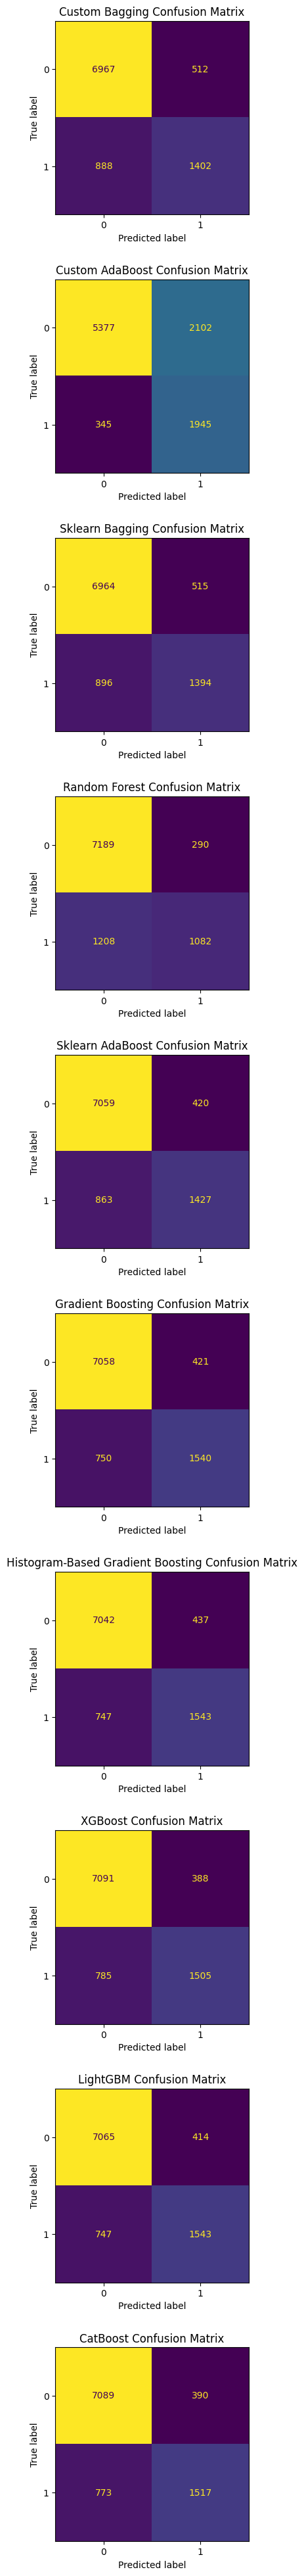


Summary of Results:
Custom Bagging:
  Accuracy: 0.8567
  Precision: 0.8507
  Recall: 0.8567
  F1 Score: 0.8520
  Training Time: 19.8401
Custom AdaBoost:
  Accuracy: 0.7495
  Precision: 0.8321
  Recall: 0.7495
  F1 Score: 0.7676
  Training Time: 17.7197
Sklearn Bagging:
  Accuracy: 0.8556
  Precision: 0.8495
  Recall: 0.8556
  F1 Score: 0.8508
  Training Time: 5.1008
Random Forest:
  Accuracy: 0.8467
  Precision: 0.8403
  Recall: 0.8467
  F1 Score: 0.8319
  Training Time: 43.2544
Sklearn AdaBoost:
  Accuracy: 0.8687
  Precision: 0.8633
  Recall: 0.8687
  F1 Score: 0.8635
  Training Time: 4.0417
Gradient Boosting:
  Accuracy: 0.8801
  Precision: 0.8761
  Recall: 0.8801
  F1 Score: 0.8768
  Training Time: 934.4596
Histogram-Based Gradient Boosting:
  Accuracy: 0.8788
  Precision: 0.8748
  Recall: 0.8788
  F1 Score: 0.8756
  Training Time: 3.9821
XGBoost:
  Accuracy: 0.8799
  Precision: 0.8756
  Recall: 0.8799
  F1 Score: 0.8758
  Training Time: 48.4657
LightGBM:
  Accuracy: 0.8812
  Prec

In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, BaggingClassifier as SklearnBagging
from sklearn.ensemble import AdaBoostClassifier as SklearnAdaBoost
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import numpy as np
import matplotlib.pyplot as plt
import time

# Add new models
models = {
    "Custom Bagging": custom_bagging(),
    "Custom AdaBoost": custom_adaboost(),
    "Sklearn Bagging": SklearnBagging(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Sklearn AdaBoost": SklearnAdaBoost(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Histogram-Based Gradient Boosting": HistGradientBoostingClassifier(max_iter=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_seed=42),
}

# Dictionary to store results
results = {}

# Define Optuna optimization for hyperparameter tuning
def optimize_hyperparameters(model_name, train_X, train_y, val_X, val_y):
    def objective(trial):
        if model_name == "Random Forest":
            params = {
                "n_estimators": trial.suggest_int("n_estimators", 50, 200),
                "max_depth": trial.suggest_int("max_depth", 5, 30),
                "min_samples_split": trial.suggest_float("min_samples_split", 0.1, 1.0),
            }
            model = RandomForestClassifier(**params, random_state=42)

        elif model_name == "Gradient Boosting":
            params = {
                "n_estimators": trial.suggest_int("n_estimators", 50, 200),
                "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
                "max_depth": trial.suggest_int("max_depth", 3, 15),
            }
            model = GradientBoostingClassifier(**params, random_state=42)

        elif model_name == "XGBoost":
            params = {
                "n_estimators": trial.suggest_int("n_estimators", 50, 200),
                "max_depth": trial.suggest_int("max_depth", 3, 15),
                "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
                "subsample": trial.suggest_float("subsample", 0.6, 1.0),
            }
            model = XGBClassifier(**params, use_label_encoder=False, eval_metric="logloss", random_state=42)

        elif model_name == "LightGBM":
            params = {
                "n_estimators": trial.suggest_int("n_estimators", 50, 200),
                "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
                "max_depth": trial.suggest_int("max_depth", -1, 15),
                "num_leaves": trial.suggest_int("num_leaves", 20, 50),
            }
            model = LGBMClassifier(**params, random_state=42)

        elif model_name == "CatBoost":
            params = {
                "iterations": trial.suggest_int("iterations", 50, 200),
                "depth": trial.suggest_int("depth", 4, 10),
                "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
            }
            model = CatBoostClassifier(**params, verbose=0, random_seed=42)

        else:
            raise ValueError(f"Unsupported model: {model_name}")

        # Fit model and evaluate accuracy
        model.fit(train_X, train_y)
        preds = model.predict(val_X)
        accuracy = accuracy_score(val_y, preds)
        return accuracy

    # Optimize with Optuna
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=20)

    print(f"Best parameters for {model_name}: {study.best_params}")
    print(f"Best score for {model_name}: {study.best_value}")

    return study.best_params

# Train and evaluate models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    start_time = time.time()

    if model_name in ["Random Forest", "Gradient Boosting", "XGBoost", "LightGBM", "CatBoost"]:
        # Perform Optuna hyperparameter tuning
        best_params = optimize_hyperparameters(model_name, X_train_preprocessed.toarray(), y_train, X_test_preprocessed.toarray(), y_test)
        if model_name == "Random Forest":
            model = RandomForestClassifier(**best_params, random_state=42)
        elif model_name == "Gradient Boosting":
            model = GradientBoostingClassifier(**best_params, random_state=42)
        elif model_name == "XGBoost":
            model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric="logloss", random_state=42)
        elif model_name == "LightGBM":
            model = LGBMClassifier(**best_params, random_state=42)
        elif model_name == "CatBoost":
            model = CatBoostClassifier(**best_params, verbose=0, random_seed=42)

    # Fit the model
    model.fit(X_train_preprocessed.toarray(), y_train)
    y_pred = model.predict(X_test_preprocessed.toarray())

    # Measure time taken
    training_time = time.time() - start_time

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Training Time": training_time,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
    }

    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print("-" * 50)

# Visualize confusion matrices
fig, axes = plt.subplots(len(models), 1, figsize=(10, len(models) * 4))
fig.tight_layout(pad=5.0)

for i, (model_name, metrics) in enumerate(results.items()):
    cm = metrics["Confusion Matrix"]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    ax = axes[i] if len(models) > 1 else axes
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(f"{model_name} Confusion Matrix")

plt.show()

# Print results summary
print("\nSummary of Results:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        if metric_name != "Confusion Matrix":
            print(f"  {metric_name}: {value:.4f}")


**18. Conclusion**

Лучшая модель: LightGBM

1. Она предлагает наилучший баланс точности (88,12%), оценки F1 (0,8778) и разумного времени обучения (19,18 секунд).
2. Если время обучения имеет решающее значение (например, для приложений в реальном времени), рассмотрите вариант Histogram-Based Gradient Boosting из-за его сопоставимой точности (87,88%) и сверхбыстрого времени обучения (3,98 секунд).